In [4]:
import pandas as pd
import joblib  # Modelleri kaydetmek için gerekli kütüphane
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report


df = pd.read_csv("NYC_Crash_Model_Final_Last.csv")

TARGET_COLUMN = "SEVERITY"


IMPORTANT_FEATURES = [
    'LATITUDE', 'LONGITUDE', 'HOUR', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 
    'VEHICLE_1_GROUP_Two Wheeler', 'VEHICLE_2_GROUP_Two Wheeler', 'IS_MULTI_VEHICLE'
]

X = df[IMPORTANT_FEATURES]
y = df[TARGET_COLUMN]

print(f"Veri Hazır. Kullanılan Özellik Sayısı: {X.shape[1]}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


joblib.dump(scaler, 'scaler.pkl')
print(">> 'scaler.pkl' başarıyla kaydedildi.")


models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight='balanced', random_state=42)
}


print("\nModel eğitimi ve kayıt işlemi başlıyor...\n")

for name, model in models.items():

    model.fit(X_train_scaled, y_train)
    

    y_pred = model.predict(X_test_scaled)
    print(f"==== {name} ====")
    print(classification_report(y_test, y_pred))
    

    filename = f"model_{name}.pkl"
    joblib.dump(model, filename)
    print(f">> '{filename}' başarıyla kaydedildi.\n")

print("-" * 30)
print("TÜM İŞLEMLER TAMAMLANDI.")
print("Dosyalar çalışma dizinine (klasörüne) kaydedildi.")

Veri Hazır. Kullanılan Özellik Sayısı: 9
>> 'scaler.pkl' başarıyla kaydedildi.

Model eğitimi ve kayıt işlemi başlıyor...

==== LogisticRegression ====
              precision    recall  f1-score   support

           0       0.83      0.75      0.79    289566
           1       0.40      0.52      0.45     92649

    accuracy                           0.70    382215
   macro avg       0.62      0.64      0.62    382215
weighted avg       0.73      0.70      0.71    382215

>> 'model_LogisticRegression.pkl' başarıyla kaydedildi.



C:\Users\ingin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


==== KNeighborsClassifier ====
              precision    recall  f1-score   support

           0       0.80      0.91      0.85    289566
           1       0.50      0.29      0.36     92649

    accuracy                           0.76    382215
   macro avg       0.65      0.60      0.61    382215
weighted avg       0.73      0.76      0.73    382215

>> 'model_KNeighborsClassifier.pkl' başarıyla kaydedildi.

==== GaussianNB ====
              precision    recall  f1-score   support

           0       0.79      0.98      0.88    289566
           1       0.76      0.19      0.31     92649

    accuracy                           0.79    382215
   macro avg       0.77      0.59      0.59    382215
weighted avg       0.78      0.79      0.74    382215

>> 'model_GaussianNB.pkl' başarıyla kaydedildi.

==== DecisionTreeClassifier ====
              precision    recall  f1-score   support

           0       0.80      0.80      0.80    289566
           1       0.37      0.36      0.37 

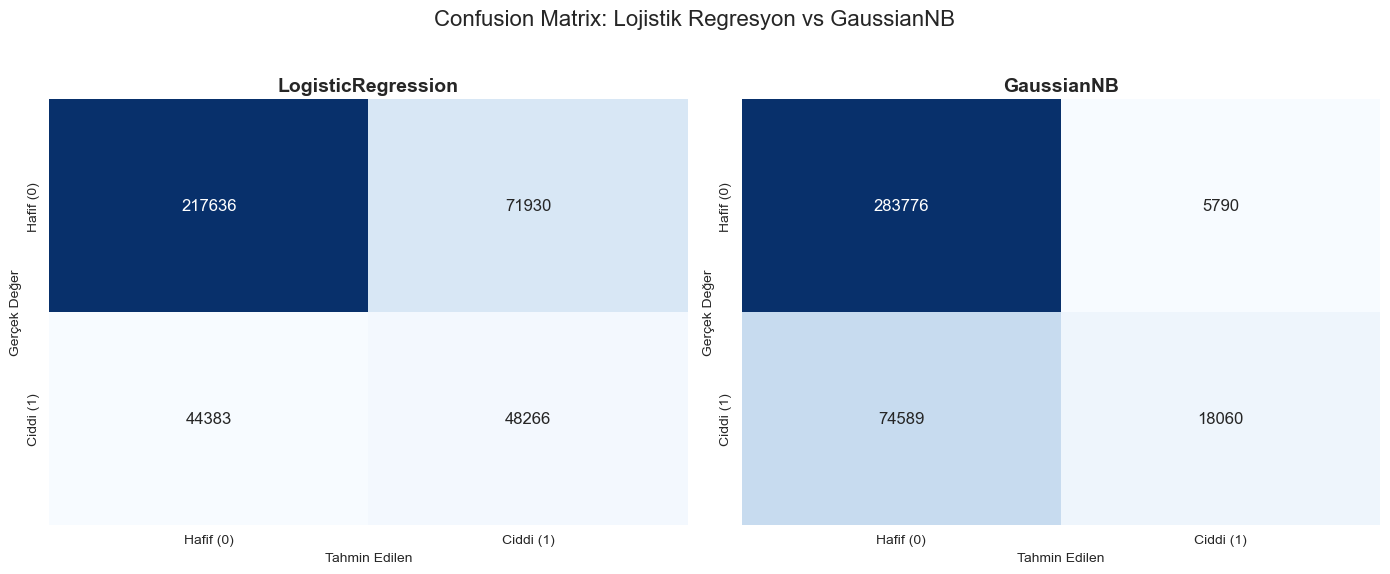

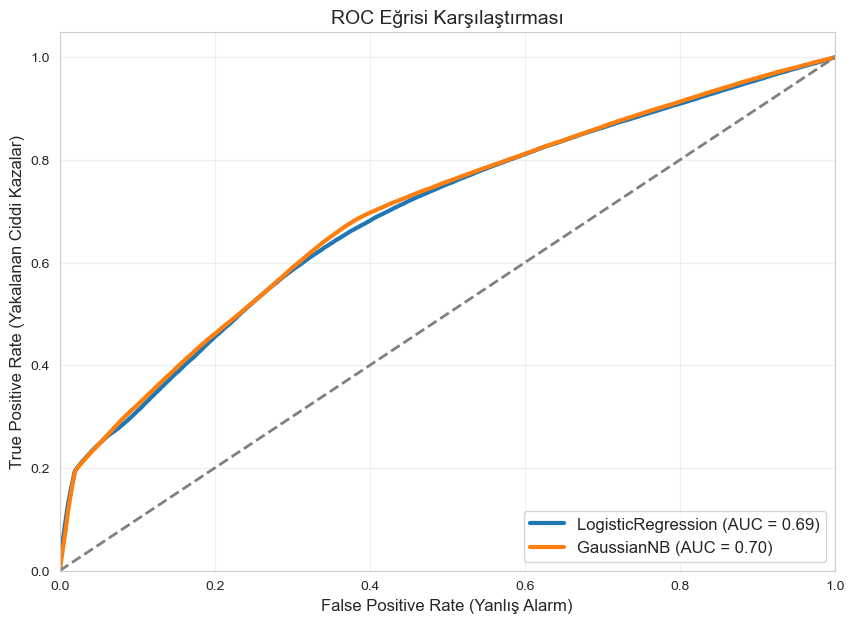

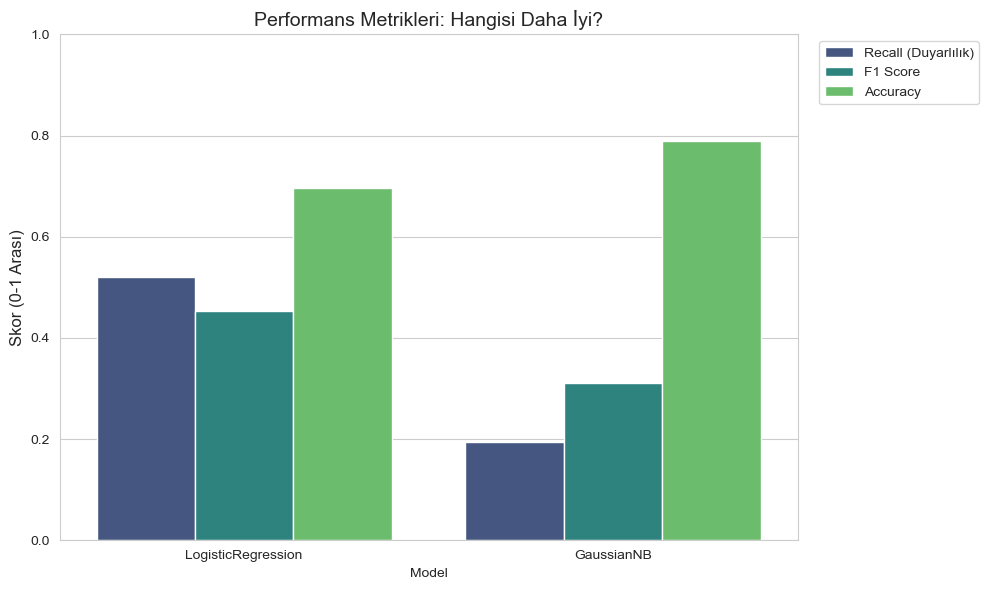

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sadece istediğin 2 Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, recall_score, accuracy_score

# Görsel stili
sns.set_style("whitegrid")

# ==========================================
# 1. VERİYİ HAZIRLA VE EĞİT (Hata almamak için tekrar tanımlıyoruz)
# ==========================================
df = pd.read_csv("NYC_Crash_Model_Final_Last.csv")
TARGET_COLUMN = "SEVERITY"

# Seçilmiş 9 Özellik
IMPORTANT_FEATURES = [
    'LATITUDE', 'LONGITUDE', 'HOUR', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 
    'VEHICLE_1_GROUP_Two Wheeler', 'VEHICLE_2_GROUP_Two Wheeler', 'IS_MULTI_VEHICLE'
]

X = df[IMPORTANT_FEATURES]
y = df[TARGET_COLUMN]

# Bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SADECE İSTEDİĞİN 2 MODELİ TANIMLIYORUZ
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "GaussianNB": GaussianNB()
}

# Modelleri hızlıca eğitiyoruz
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# ==========================================
# 2. CONFUSION MATRIX (KARMAŞIKLIK MATRİSİ)
# ==========================================
# Sadece 2 model olduğu için yan yana 2 grafik yetiyor (1 satır, 2 sütun)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Confusion Matrix: Lojistik Regresyon vs GaussianNB', fontsize=16)

# Axes dizisini düzleştirmeye gerek yok ama garanti olsun
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    # Isı haritası
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 12})
    
    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Tahmin Edilen')
    axes[i].set_ylabel('Gerçek Değer')
    axes[i].set_xticklabels(['Hafif (0)', 'Ciddi (1)'])
    axes[i].set_yticklabels(['Hafif (0)', 'Ciddi (1)'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ==========================================
# 3. ROC EĞRİLERİ (MODEL AYRIŞTIRMA GÜCÜ)
# ==========================================
plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Olasılıkları al
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=3, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Alarm)', fontsize=12)
plt.ylabel('True Positive Rate (Yakalanan Ciddi Kazalar)', fontsize=12)
plt.title('ROC Eğrisi Karşılaştırması', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================
# 4. METRİK KARŞILAŞTIRMA GRAFİĞİ
# ==========================================
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': name,
        'Recall (Duyarlılık)': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Model", var_name="Metrik", value_name="Skor")

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Skor", hue="Metrik", data=df_melted, palette="viridis")
plt.title("Performans Metrikleri: Hangisi Daha İyi?", fontsize=14)
plt.ylim(0, 1.0)
plt.ylabel("Skor (0-1 Arası)", fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()